# ODE

## Model 1: 人口增长模型


In [57]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

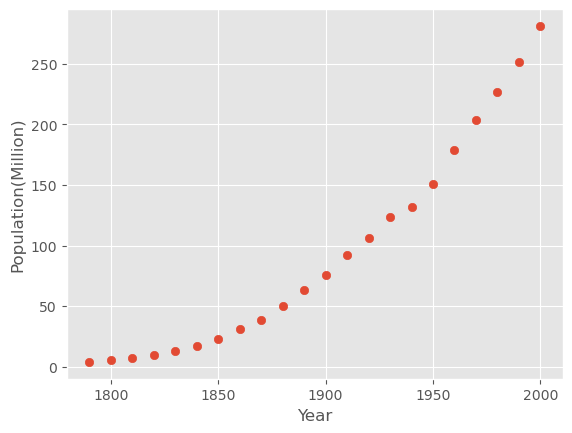

In [58]:
### step 1: data preparation and visualization
year = [i for i in range(1790,2010,10)]
population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4,38.6, 50.2,62.9,76,92,106.5,123.2,131.7,150.7,179.3,204, 226.5,251.4,281.4]
plt.scatter(year,population)
plt.xlabel("Year")
plt.ylabel("Population(Million)")
plt.show()

Case 1: 人口增长率r不变

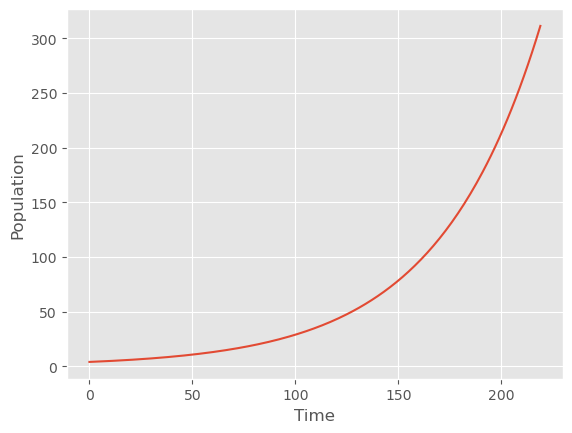

In [59]:
import numpy as np
# step 2: define the model
# x0 is the initial population, r is the growth rate, t is the time list
def exponent_model(x0, r, t):
    x_t = [x0 * np.exp(r * time) for time in t] # 
    plt.plot(t, x_t) # 
    plt.xlabel("Time") # 
    plt.ylabel("Population") # 
    plt.show()
exponent_model(3.9, 0.02, [i for i in range(0,220)])

通解是 $x_0 * e^{rt}$. 为了估计模型中的r和$x_0$, 我们一般会取对数，即构造$$y=r*t+a$$
其中,$$y=\ln x, a=\ln x_0$$

现在我们希望根据20世纪前的数据来预测二十世纪后的数据

[1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900]
ln_population_coefficient:  [0.0274324] ln_population_intercept:  -47.671675473813124


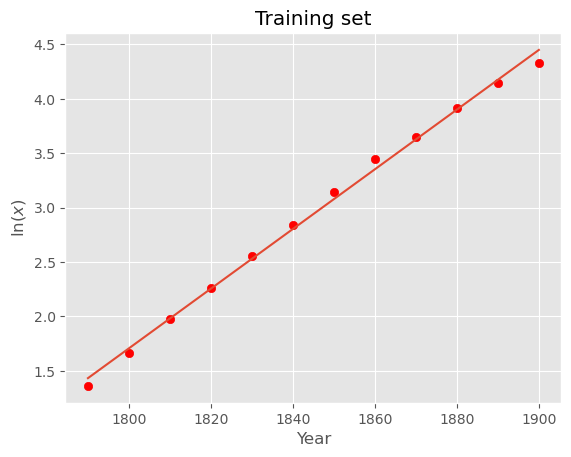

In [60]:
# step 3: Use linear regression from sklearn to fit the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
ln_population = np.log(population)
## split the data into training set and test set
training_year, test_year, training_ln_population, test_ln_population = train_test_split(year, ln_population, train_size=12, random_state = 0, shuffle = False)
print(training_year)
plt.title("Training set")
plt.scatter(training_year, training_ln_population,  color = "red")
### fit the model
model = LinearRegression()
model.fit(np.array(training_year).reshape(-1,1), training_ln_population)
### reveal the coefficient and intercept
ln_population_coefficient, ln_population_intercept = model.coef_, model.intercept_
ln_population_fit = [ln_population_coefficient * time + ln_population_intercept for time in training_year]
print("ln_population_coefficient: ", ln_population_coefficient, "ln_population_intercept: ", ln_population_intercept)
plt.plot(training_year, ln_population_fit)
plt.xlabel("Year")
plt.ylabel(r'$\ln(x)$')
plt.show()

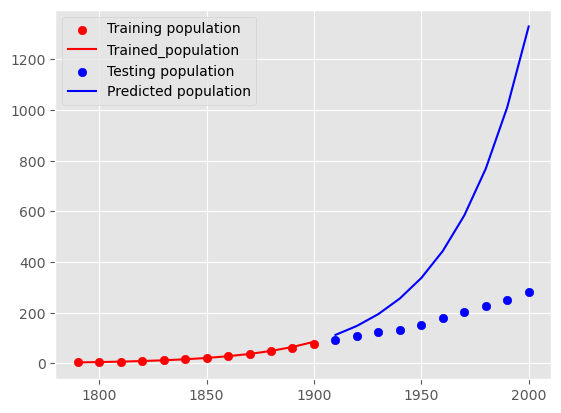

In [61]:
### predict the population in 2010
predicted_population = np.exp(model.predict(np.array(test_year).reshape(-1,1)))
test_population = np.exp(test_ln_population)
plt.scatter(training_year, np.exp(training_ln_population),  color = "red")
plt.plot(training_year, np.exp(ln_population_fit), color = "red")
plt.scatter(test_year, test_population,  color = "blue")
plt.plot(test_year, predicted_population,  color = "blue")
plt.legend(["Training population", "Trained_population", "Testing population", "Predicted population"])
plt.show()

Case 2: Logistic 模型

在这道题里恒定增长率是不正确的，因此我们引入logistic模型，基本思想为建立增长率和人口的关系, i.e., $$\frac{\mathrm{d} x}{\mathrm{~d} t}=r(x) x, x(0)=x_0$$ $$r(x)=r\left(1-\frac{x}{x_m}\right)$$, $x_m$是可容纳的最大人口数。该模型通解为
$$x(t)=\frac{x_m}{1+\left(\frac{x_m}{x_0}-1\right) e^{-r t}}$$
但是我们实际还是使用线性回归来拟合，即$$\frac{\frac{\mathrm{d} x}{\mathrm{~d} t}}{x}=r-s x, s=\frac{r}{x_m}$$来获取r 和 s


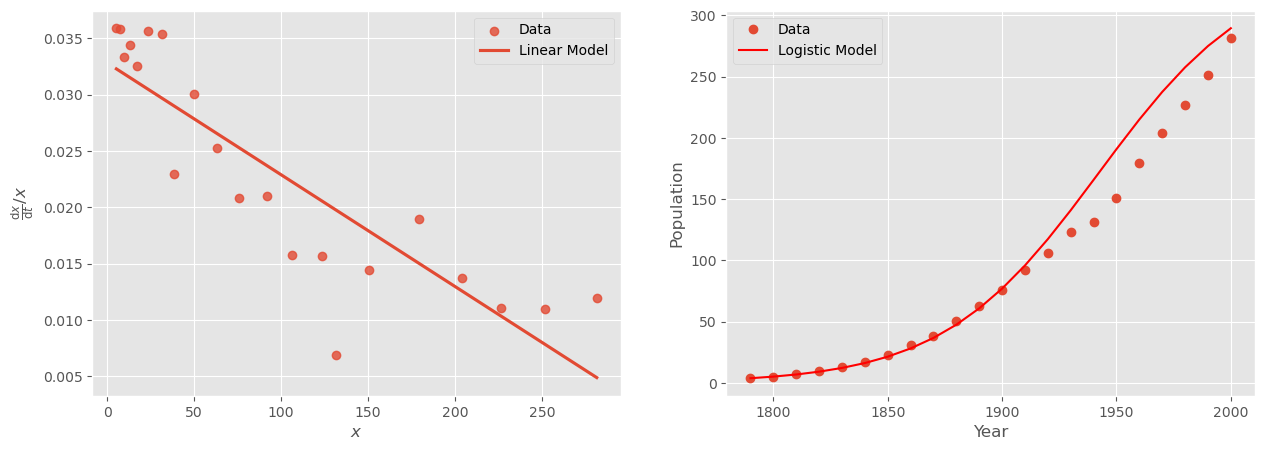

In [62]:
### Now use logistic model to predict
import seaborn as sns
logistic_training_year, logistic_test_year, logistic_training_population, logistic_test_population = train_test_split(year, population, train_size = 12, random_state = 0, shuffle = False)
y = [] # y is growth rate of population
for i in range(len(population)-1):
    y.append( (population[i+1] - population[i])/10 /
        population[i] )
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.regplot(x=population[1:],y=y,ci = 0)
plt.ylabel(r'$\frac{\mathrm{d}x}{\mathrm{d}t}/{x}$')
plt.xlabel(r'$x$')
plt.legend(['Data','Linear Model'])
lrModel = LinearRegression()
### question: why we take 7:-1 instead of 1:-1 here?
### answer: start from 7 gives a better fit
lrModel.fit(np.array(population[7:-1]).reshape(-1,1),y[6:-1])
r = lrModel.intercept_
xm = r/(- lrModel.coef_)
plt.subplot(1,2,2)
x0 = population[0]
plt.plot(year,population,'o')
pop_predicted = [xm * (1 + (xm/x0 -1)*np.exp(- r * (time - 1790)))**(-1) for time in year]
plt.plot(year,pop_predicted, color = "red")
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(['Data','Logistic Model'])
plt.show()

## Model 2: 传染病模型


### Case 1: 指数模型

假设单位时间一个病人所能感染的人数相同(等同于增长率不变):
$i(t+\Delta t)-i(t)=\lambda i(t) \Delta t$

Model 1 Case 1中给出了解析解，在这里使用递推的方法求解


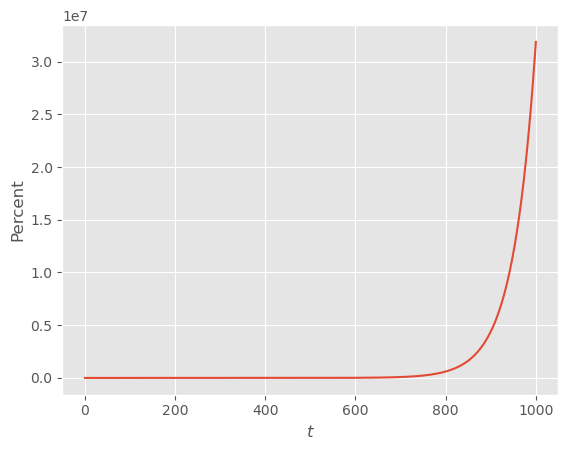

In [63]:
### Make a sample of exponent model implemented by recursion
def exp():
    deltaT = 0.01
    lamb = 2
    i_list = []
    i0 = 0.08
    i_list.append(i0)
    Tot_Time = 10
    TotStep = int(Tot_Time/deltaT)
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT
        i_list.append(i_new)
    plt.plot(i_list)
    plt.xlabel(r"$t$")
    plt.ylabel('Percent')
exp()
plt.show()

problem: 病人遇到病人不会导致患病人数的上升
### Case 2: SI 模型
solution: 区别对待病人和正常人，病人**的比例**记为i(t), 正常人**的比例**记为s(t),则一个病人单位时间能接触到的正常人为$ \lambda s(t)$, 那么可以得到$$N[i(t+\Delta t)-i(t)] =N \lambda s(t)  i(t) \Delta t$$
即$$\left\{\begin{array}{l}\frac{\mathrm{d} i}{\mathrm{~d} t}=\lambda i(1-i) \\ i(0)=i_0\end{array}\right.$$
我们可以发现此处$\lambda = r / x_m$, 因此本模型和之前的Model 1 Case 2模型是相同的

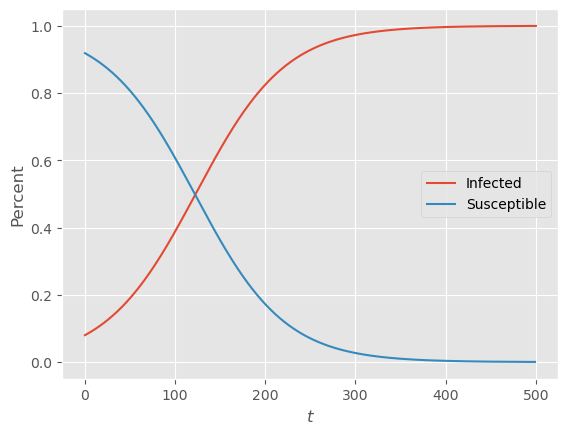

In [64]:
### implement the epidemic model
def epidemic():
    deltaT = 0.01
    lamb = 2
    i_list = []
    s_list = []
    i0 = 0.08
    i_list.append(i0)
    Tot_Time = 5
    TotStep = int(Tot_Time/deltaT)
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * (1 - i_list[-1]) * deltaT
        i_list.append(i_new)
        s_list.append(1 - i_new)
    plt.plot(i_list, label = "Infected")
    plt.plot(s_list, label = "Susceptible")
    plt.xlabel(r"$t$")
    plt.ylabel('Percent')
    plt.legend()
epidemic()

但是这个logistic模型的最终情况还是全部感染，不太符合实际传染病的情况。
因此我们新增治愈率$\mu$,代表每天可治愈的比例。
### Case 3: SIS 模型

那么通解为$N[i(t+\Delta t)-i(t)]=[\lambda s(t)] N i(t) \Delta t-\mu N i(t) \Delta t$

即$\left\{\begin{array}{l}\frac{\mathrm{d} i}{\mathrm{~d} t}=\lambda i(1-i)-\mu i \\ i(0)=i_0\end{array}\right.$
然后我们递推求解 $i(t+\Delta t)=i(t)+\lambda i(t) s(t) \Delta t-\mu i(t) \Delta t$

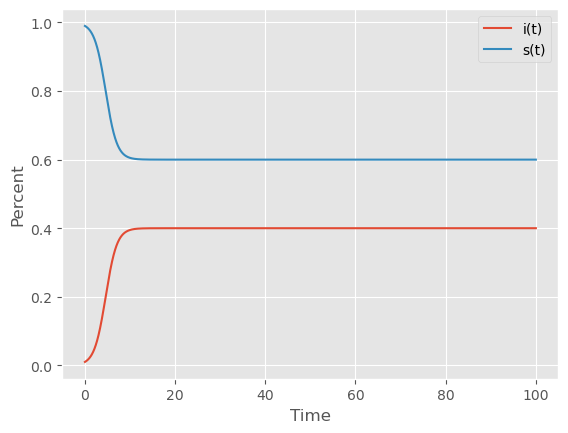

In [65]:
def SIS():
    i0 = 0.01; # 初始有的人感染1%
    lamb = 2;
    s0 = 1- i0; # 初始未感染人数比例
    mu = 1.2;
    i_list = []
    s_list = []
    i_list.append(i0) # 输入i0
    s_list.append(s0) # 输入s0
    TotTime = 100
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep) # 表示取整数int
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu * i_list[-1]*TimeStep
        i_list.append(i_new) # 输入，继续循环i_new
        s_list.append(1-i_new) # 输入(1-i_new)，继续循环
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list) # i(t)
    plt.plot(Time,s_list) # s(t)
    plt.xlabel("Time") # 加横坐标label
    plt.ylabel("Percent") # 加纵坐标label
    plt.legend(["i(t)","s(t)"])
SIS()
plt.show()

### Case 4: SIR 模型
有的传染病具有免疫性, 病人治愈后即移出系统, 称为移出者。 我们将人群分成三个群体: 已感染者（病人, Infected）、末感染者 （健康者, Suspect）和免疫者（Removed）, 病人被治愈后永久免 疫。 
SIS: $N[i(t+\Delta t)-i(t)]=[\lambda s(t)] N i(t) \Delta t-\mu N i(t) \Delta t$ 在时间段 $\Delta t$ 内, 病人的增量可以用如下的公式进行计算
$$
\text { SIR: } N[i(t+\Delta t)-i(t)]=[\lambda s(t)] N i(t) \Delta t-\mu N i(t) \Delta t
$$
SIR : $\quad N[s(t+\Delta t)-s(t)]=-[\lambda s(t)] N i(t) \Delta t$，
取极限 $\Delta t \rightarrow 0$, 得到如下的微分方程
$$
\left\{\begin{array}{l}
\frac{\mathrm{d} i}{\mathrm{~d} t}=\lambda s i-\mu i \\
\frac{\mathrm{d} s}{\mathrm{~d} t}=-\lambda s i \\
i(0)=i_0, s(0)=s_0
\end{array}\right.
$$

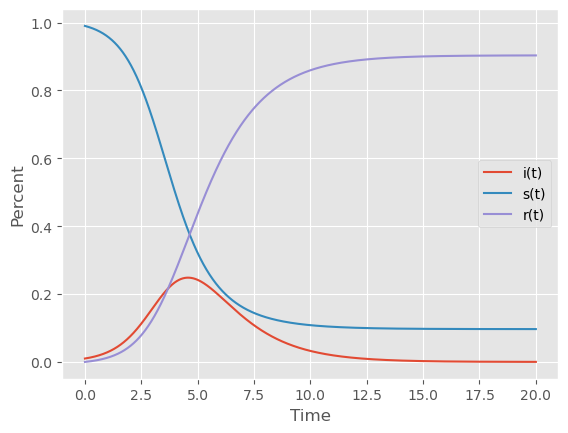

In [66]:
## SIR模型
def SIR():
    i0 = 0.01; # 初始有的人感染1%
    r0 = 0; # 初始没有人免疫
    lamb = 1.8 # 参数
    s0 = 1- i0; # 初始未感染人数比例
    mu = 0.7; # 参数
    i_list = []
    s_list = []
    r_list = []
    i_list.append(i0) # 输入i0
    s_list.append(s0) # 输入s0
    r_list.append(r0) # 输入r0
    TotTime = 20
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep) # 表示取整数int
    ## 递推地求解差分方程
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu * i_list[-1]*TimeStep
        s_new = s_list[-1] - lamb * s_list[-1] * i_list[-1]*TimeStep
        i_list.append(i_new) # 输入，继续循环i_new
        s_list.append(s_new) # 输入，继续循环s_new
        r_list.append(1-i_new-s_new) # 输入1-i_new-，继续循环s_new
    Time = [TimeStep * i for i in range(TotStep+1)]
    ## 可视化传染过程
    plt.plot(Time,i_list) # i(t)
    plt.plot(Time,s_list) # s(t)
    plt.plot(Time,r_list) # r(t)
    plt.xlabel("Time") # 加横坐标label
    plt.ylabel("Percent") # 加纵坐标label
    plt.legend(["i(t)","s(t)","r(t)"]) # 绘图
SIR()
plt.show()

### Case 4: Volterra 模型
因为大海中资源丰富, 假设当食饵独立生存时以指数规律增长, 增长 率为 $r$,于是
$$
\frac{\mathrm{d} x}{\mathrm{~d} t}=r x
$$
但是捕食者的存在, 使得食饵的增长率减小, 设减少率与捕食者的数 量成正比, 于是 $x(t)$ 满足方程
$$
\frac{\mathrm{d} x}{\mathrm{~d} t}=x(r-a y)=r x-a x y
$$
比例系数 $a$ 反映捕食者捕食食饵的能力。
捕食者离开食饵无法生存, 设它独自存在时死亡率为 $d$, 即
$$
\frac{\mathrm{d} y}{\mathrm{~d} t}=-d y
$$
而食饵的存在为捕食者提供了食物, 相当于使捕食者的死亡率降低, 且促使其增长。设增长率与食饵数量成正比, 于是 $y(t)$ 满足
$$
\frac{\mathrm{d} y}{\mathrm{~d} t}=y(-d+b x)=-d y+b x y
$$
比例系数 $b$ 反映食饵对捕食者的供养能力
递推公式为
$\left\{\begin{array}{l}x(t+\Delta t)=x(t)+\Delta t[r x(t)-a x(t) y(t)] \\ y(t+\Delta t)=y(t)+\Delta t[-d y(t)+b x(t) y(t)]\end{array}\right.$

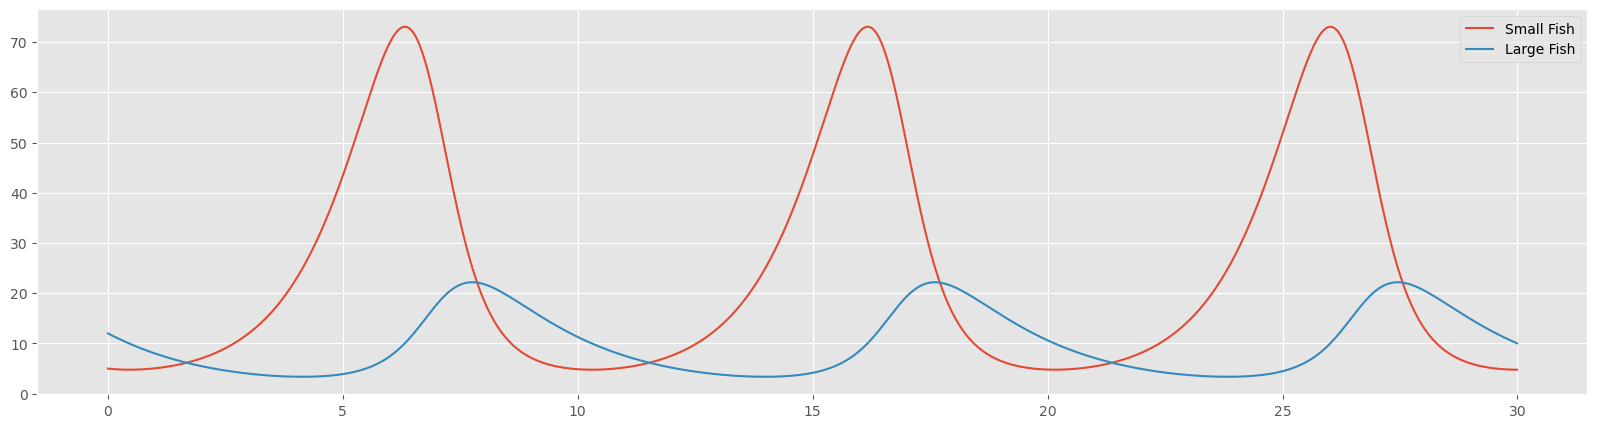

In [67]:
r = 1
d = 0.5
a = 0.1
b = 0.02
x0 = 5
y0 = 12
deltaT = 0.01
TotTime = 30
timeStep = TotTime/deltaT
xlist = []
ylist = []
xlist.append(x0) # 输入x0
ylist.append(y0) # 输入y0
TimeList = [i*deltaT for i in range(int(timeStep))]
# 递推地求解差分方程
for time in TimeList:
    xlist.append(xlist[-1] + deltaT * (r *xlist[-1] - a*xlist[-1]*ylist[-1] ) )
    ylist.append(ylist[-1] + deltaT * (-d *ylist[-1] + b*xlist[-1]*ylist[-1] ) )
# 变化过程可视化
plt.figure(figsize = (20,5))
plt.plot(TimeList,xlist[:-1],label = 'Small Fish')
plt.plot(TimeList,ylist[:-1],label = 'Large Fish')
plt.legend()

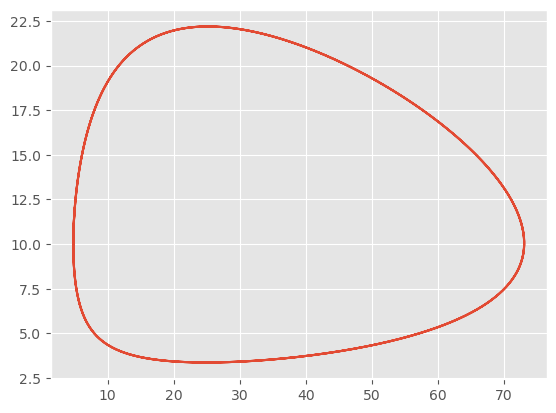

In [68]:
plt.plot(xlist,ylist) ## 相轨线

$\bar{x}=x_0=\frac{d}{b}, \quad \bar{y}=y_0=\frac{r}{a}$
- 捕食者的数量 (用一个周期内的平均值 $\bar{y}$ 代替) 与食饵增长率 $r$ 成正 比, 与他掠食食饵的能力 $a$ 成反比;
- 食饵的数量（用一个周期内的平均值 $\bar{x}$ 代替）与捕食者死亡率 $d$ 成 正比, 与他供养捕食者的能力 $b$ 成反比。
- 然后再加入人为因素，使捕食者的被捕获比例为e，那么$\overline{x_1}=\frac{d+e}{b} \quad \overline{y_1}=\frac{r-e}{a}$

In [69]:
### Logistic ?


考虑种群竞争模型
$$
\left\{\begin{array}{l}
\frac{\mathrm{d} x_1}{\mathrm{~d} t}=r_1 x_1\left(1-\frac{x_1}{N_1}-\sigma_1 \frac{x_2}{N_2}\right) \\
\frac{\mathrm{d} x_2}{\mathrm{~d} t}=r_2 x_2\left(1-\sigma_2 \frac{x_1}{N_1}-\frac{x_2}{N_2}\right)
\end{array}\right.
$$
取 $r_1=0.2, r_2=0.3, \sigma_1=1.2, \sigma_2=0.5, N_1=100, N_2=70, x_1(0)=$ $30, x_2(0)=40$, 使用本节课程学到的数值方法研究两个种群的发展模

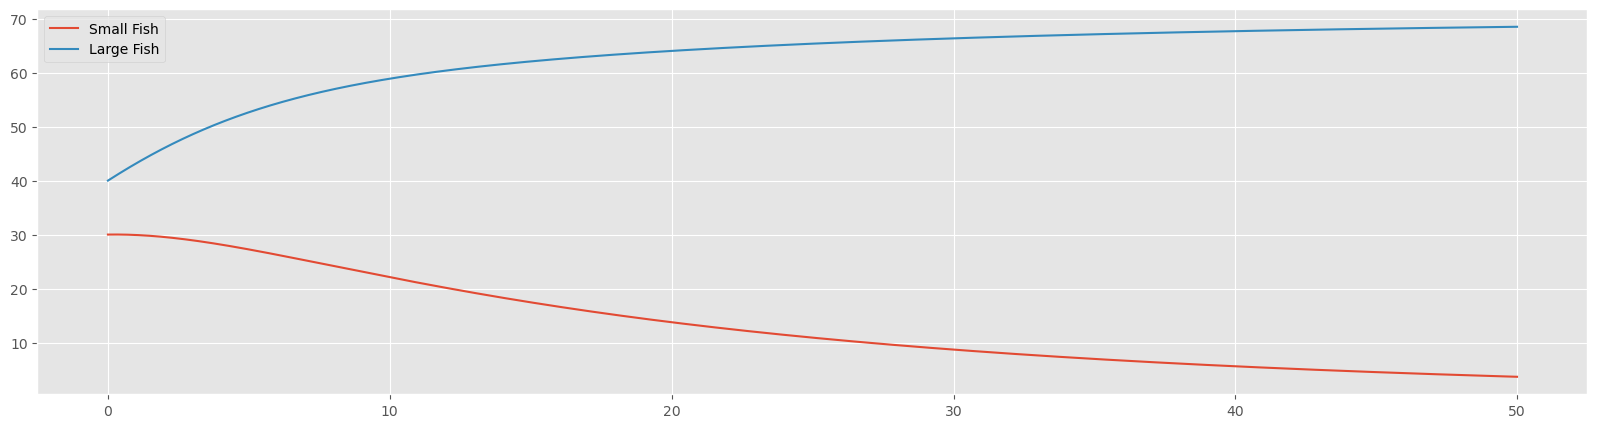

In [80]:
### Homework: 种群竞争模型
def competition(r1, r2, sigma1, sigma2, N1, N2, x1_0, x2_0):
    deltaT = 0.01
    TotTime = 50
    timeStep = TotTime/deltaT
    xlist = []
    ylist = []
    xlist.append(x1_0) # 输入x0
    ylist.append(x2_0) # 输入y0
    TimeList = [i*deltaT for i in range(int(timeStep))]

    # 递推地求解差分方程
    for time in TimeList:
        xlist.append(xlist[-1] +deltaT * (r1 *xlist[-1])*(1 - xlist[-1]/N1 - sigma1 * ylist[-1]/N2))
        ylist.append(ylist[-1] +deltaT * (r2 *ylist[-1])*(1 - sigma2* xlist[-1]/N1 - ylist[-1]/N2))
    # 结果可视化
    plt.figure(figsize = (20,5))
    plt.plot(TimeList,xlist[:-1],label = 'Small Fish')
    plt.plot(TimeList,ylist[:-1],label = 'Large Fish')
    plt.legend()
    plt.show()
competition(0.2, 0.3, 1.2, 0.5, 100, 70, 30, 40)